# Music Producers Gender Distribution

## Querying a SPARQL endpoint with SPARQLWrapper library

In [82]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"


my_SPARQL_query = """
SELECT DISTINCT ?gendername (COUNT(?person) AS ?totResult)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 ?gender ;
              wdt:P106/wdt:P279* wd:Q183945. 
       ?gender rdfs:label ?gendername .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" . }
       FILTER (lang(?gendername) = 'en')
}
GROUP BY ?gendername
ORDER BY DESC(?totResult)
"""

sparql_wd = SPARQLWrapper(wikidata_endpoint)
sparql_wd.setQuery(my_SPARQL_query)
sparql_wd.setReturnFormat(JSON)
totalResults = sparql_wd.query().convert()

In [83]:
musicProducers = dict()  #producer
totNumber = list()   #totNumber

for result in totalResults["results"]["bindings"]:
    gender = result["gendername"]["value"]
    total = result["totResult"]["value"]
    musicProducers[gender] = total
    totNumber.append(int(total))
    print("Number of " + gender + " music producers is " + total)
    
allProducers = sum(totNumber)
musicProducers['totResult'] = str(allProducers)
print("Number of all music producers is " + str(allProducers))

final_json = dict()
final_json["producers"] = musicProducers
pp.pprint(musicProducers)

Number of male music producers is 14993
Number of female music producers is 962
Number of trans woman music producers is 10
Number of non-binary music producers is 8
Number of trans man music producers is 2
Number of genderqueer music producers is 1
Number of genderfluid music producers is 1
Number of intersex music producers is 1
Number of all music producers is 15978
{'female': '962',
 'genderfluid': '1',
 'genderqueer': '1',
 'intersex': '1',
 'male': '14993',
 'non-binary': '8',
 'totResult': '15978',
 'trans man': '2',
 'trans woman': '10'}


In [84]:
import numpy as np # we will use this later, so import it now
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()


genders = ['male','female','trans woman','non-binary','trans man','intersex','genderfluid','genderqueer']

totalm = int(musicProducers.get('male'))
totalf = int(musicProducers.get('female'))
totaltw = int(musicProducers.get('trans woman'))
totalnb = int(musicProducers.get('non-binary'))
totaltm = int(musicProducers.get('trans man'))
totali = int(musicProducers.get('intersex'))
totalgf = int(musicProducers.get('genderfluid'))
totalgq = int(musicProducers.get('genderqueer'))


color_list = ["#7dbf6f","#099bf7", "#8c3b6e", "#ade6dc", "#aba77d", "#708847", "#f1b82b", "#d74e81"]

p = figure(x_range=genders, plot_height=500, title="gender distribution")
p.vbar(x=genders, top=[totalm, totalf, totaltw, totalnb, totaltm, totali, totalgf, totalgq], color=color_list, width=0.6)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

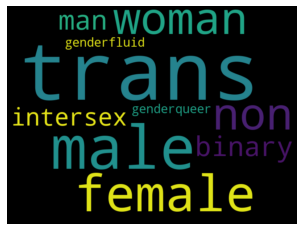

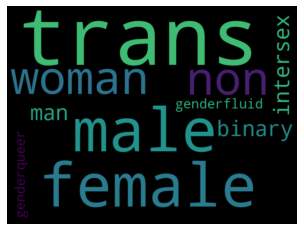

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
# text=("Python Python Python Matplotlib")
text = ('male female trans woman non-binary trans man intersex genderfluid genderqueer')

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600, margin=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Nationality of female producers

In [103]:
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

top_nation = '''
SELECT ?countryLabel (COUNT(?human) AS ?total)

WHERE 
{ 
  ?human wdt:P21 wd:Q6581072; 
         wdt:P106 wd:Q183945; 
         wdt:P27 ?country
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?countryLabel 
ORDER BY DESC(?total)
LIMIT 10
'''

# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(top_nation)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
top_nation_result = sparql_wd.query().convert()


ERROR! Session/line number was not unique in database. History logging moved to new session 59


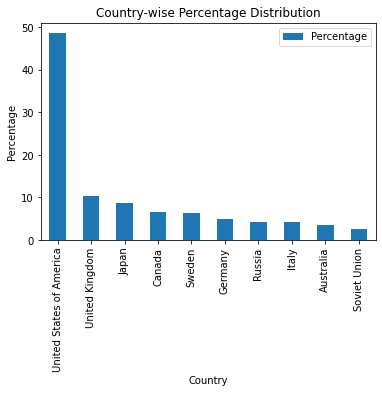

In [106]:
#create CSV
import pandas as pd
import csv

with open('countryProducers.csv', mode='w') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['Country', 'Number'])
    for result in top_nation_result ["results"]["bindings"]:
        my_writer.writerow([result["countryLabel"]["value"], result["total"]["value"].strip()])
        
# parse the csv into a dataframe
df = pd.read_csv("countryProducers.csv")


# print the first 10 rows
df.head(10)

sum = df['Number'].sum()

percentage = (df['Number']/sum)*100

    
df['Percentage']= percentage

df['Percentage']= df['Percentage'].round(decimals = 2)

#print the first 20 rows
df.head(10)


import matplotlib.pyplot as plt

# Bar chart visualization
df.plot(x='Country', y='Percentage', kind='bar')

# Adding title and labels
plt.title('Country-wise Percentage Distribution')
plt.xlabel('Country')
plt.ylabel('Percentage')

# Show the plot
plt.show()

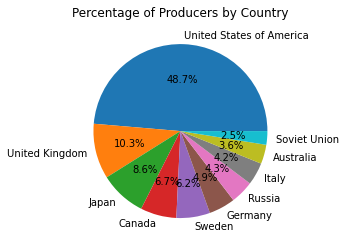

In [107]:
import matplotlib.pyplot as plt

# create a pie chart
plt.pie(df['Percentage'], labels=df['Country'], autopct='%1.1f%%')

# add title
plt.title('Percentage of Producers by Country')

# show the chart
plt.show()


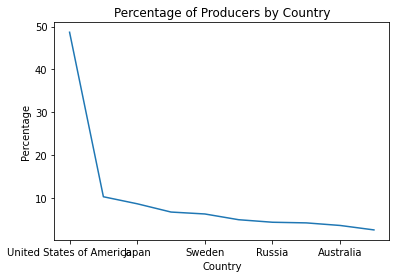

In [108]:
import matplotlib.pyplot as plt

# create a line chart
df.plot(kind='line', x='Country', y='Percentage', legend=False)

# add labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage of Producers by Country')

# show the chart
plt.show()

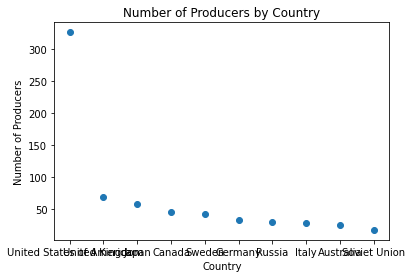

In [109]:
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(df['Country'], df['Number'])

# add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Producers')
plt.title('Number of Producers by Country')

# show the chart
plt.show()